In [1]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt

In [2]:
# we will define some constants 
  
# name of the csv dataset 
DATASET_FILENAME = 'july24_dataset.csv'
  
# define the operator to be filtered upon. 
CONST_OPERATOR = 'JIO'
  
# define the state to be filtered upon. 
CONST_STATE = 'Delhi'
  
# define the the technology to be filtered upon 
CONST_TECHNOLOGY = '4G'

In [3]:
#make list of all this things
final_download_speeds = [] 
final_upload_speeds = [] 
final_states = [] 
final_operators = [] 

In [4]:
df=pd.read_csv('july24_dataset.csv')

In [5]:
df.head()

,service_provider,tech,test_type,output,signal_strength,circle
0,JIO,4G,download,12890,na,Punjab
1,AIRTEL,4G,download,2676,na,Haryana
2,AIRTEL,4G,upload,1857,na,Haryana
3,AIRTEL,4G,upload,6280,-103,Haryana
4,AIRTEL,4G,download,17236,-104,Haryana


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 430730 entries, 0 to 430729
Data columns (total 6 columns):
 #   Column            Non-Null Count   Dtype 
---  ------            --------------   ----- 
 0   service_provider  430730 non-null  object
 1   tech              430730 non-null  object
 2   test_type         430730 non-null  object
 3   output            430730 non-null  int64 
 4   signal_strength   430730 non-null  object
 5   circle            430730 non-null  object
dtypes: int64(1), object(5)
memory usage: 19.7+ MB


In [7]:
df.describe()

,output
count,430730.000000
mean,17751.978794
std,22168.316450
min,2.000000
25%,2646.000000
50%,7970.000000
75%,24799.000000
max,149962.000000


In [8]:
#renamed columns as per our wish
df.columns = ['Service Provider', 'Technology', 'Test Type', 
                   'Data Speed', 'Signal Strength', 'State']  

In [9]:
df.head()

,Service Provider,Technology,Test Type,Data Speed,Signal Strength,State
0,JIO,4G,download,12890,na,Punjab
1,AIRTEL,4G,download,2676,na,Haryana
2,AIRTEL,4G,upload,1857,na,Haryana
3,AIRTEL,4G,upload,6280,-103,Haryana
4,AIRTEL,4G,download,17236,-104,Haryana


In [10]:
#finding all the unique states and operators in this dataset

# find and display the unique states 

states = df['State'].unique() 
print('STATES Found: ', states) 
  
# find and display the unique operators

operators = df['Service Provider'].unique() 
print('OPERATORS Found: ', operators) 

STATES Found:  ['Punjab' 'Haryana' 'Kolkata' 'West Bengal' 'Chennai' 'Gujarat' 'UP West'
 'Maharashtra' 'Andhra Pradesh' 'Kerala' 'Tamil Nadu' 'UP East' 'Orissa'
 'Karnataka' 'Madhya Pradesh' 'Rajasthan' 'Mumbai' 'Himachal Pradesh'
 'Delhi' 'Bihar' 'Assam' 'North East' 'Jammu & Kashmir']
OPERATORS Found:  ['JIO' 'AIRTEL' 'Vi India' 'CELLONE']


In [14]:

# filter out the operator and technology 
filtered = df[(df['Service Provider'] == CONST_OPERATOR)  
               & (df['Technology'] == CONST_TECHNOLOGY)] 
  
# iterate through each of the states 
for state in states: 
  
    # create new dataframe which contains 
    # only the data of the current state 
    base = filtered[filtered['State'] == state] 
  
    # filter only download speeds based on test type 
    down = base[base['Test Type'] == 'download'] 
  
    # filter only upload speeds based on test type 
    up = base[base['Test Type'] == 'upload'] 
  
    # calculate mean of speeds in Data Speed 

    avg_down = down['Data Speed'].mean() 
  
    # calculate mean of speeds 
    # in Data Speed column 
    avg_up = up['Data Speed'].mean() 
  
    # discard values if mean is not a number(nan) 
    # and append only the valid ones 
    if (pd.isnull(avg_down) or pd.isnull(avg_up)): 
        down, up = 0, 0
      
    else: 
        final_states.append(state) 
        final_download_speeds.append(avg_down) 
        final_upload_speeds.append(avg_up) 
  
        # print output upto 2 decimal places 
        print(str(state) + ' -- Avg. Download: ' + str('%.2f'% avg_down) + '  Avg. Upload: ' + str('%.2f' % avg_up)) 

Punjab -- Avg. Download: 34711.72  Avg. Upload: 7802.74
Haryana -- Avg. Download: 16522.82  Avg. Upload: 5331.31
Kolkata -- Avg. Download: 38594.46  Avg. Upload: 6502.83
West Bengal -- Avg. Download: 22598.97  Avg. Upload: 6167.18
Chennai -- Avg. Download: 48385.36  Avg. Upload: 5183.27
Gujarat -- Avg. Download: 33906.66  Avg. Upload: 7469.61
UP West -- Avg. Download: 32927.46  Avg. Upload: 4974.05
Maharashtra -- Avg. Download: 26286.58  Avg. Upload: 5453.13
Andhra Pradesh -- Avg. Download: 35890.71  Avg. Upload: 6074.73
Kerala -- Avg. Download: 30851.91  Avg. Upload: 4617.89
Tamil Nadu -- Avg. Download: 37452.68  Avg. Upload: 5770.33
UP East -- Avg. Download: 34061.98  Avg. Upload: 8280.31
Orissa -- Avg. Download: 52198.38  Avg. Upload: 6973.73
Karnataka -- Avg. Download: 17457.40  Avg. Upload: 5046.55
Madhya Pradesh -- Avg. Download: 31910.07  Avg. Upload: 7107.08
Rajasthan -- Avg. Download: 35413.25  Avg. Upload: 6596.90
Mumbai -- Avg. Download: 52818.39  Avg. Upload: 4963.26
Himach

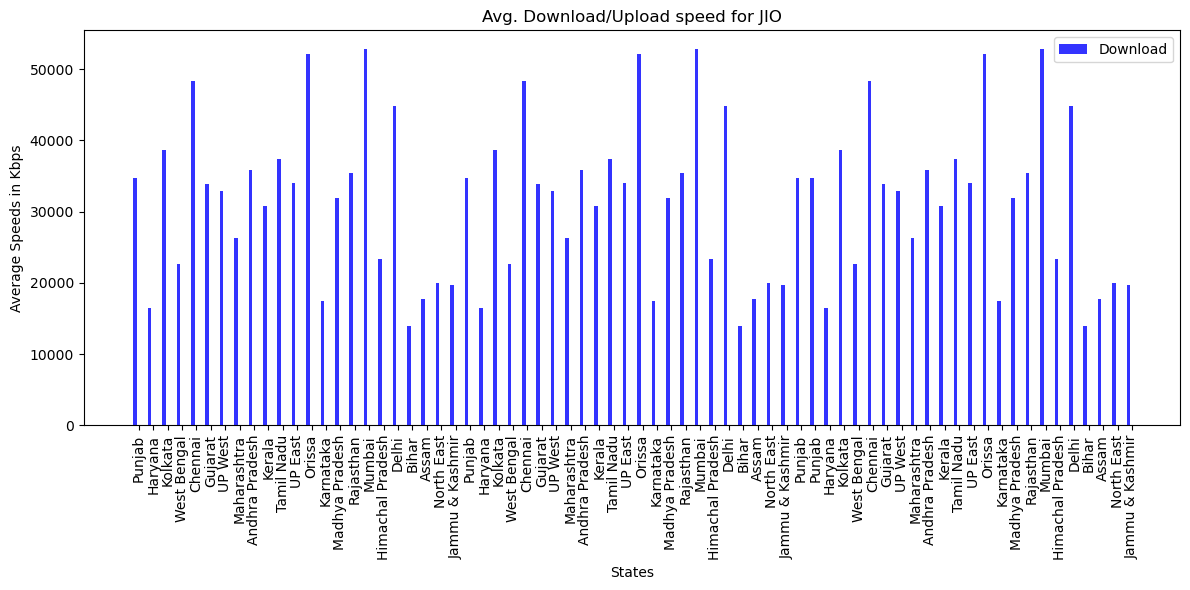

In [32]:
fig = plt.subplots(figsize=(12, 6)) 

# the width of each bar 
bar_width = 0.25

# opacity of each bar 
opacity = 0.8


# plot the download bars 
bar_download = plt.bar(index, final_download_speeds, 
					bar_width, alpha=opacity, 
					color='b', label='Download') 


# title of the graph 
plt.title('Avg. Download/Upload speed for JIO') 

# the x-axis label 
plt.xlabel('States') 

# the y-axis label 
plt.ylabel('Average Speeds in Kbps') 

# the label below each of the bars, 
# corresponding to the states 
plt.xticks(index + bar_width,final_states, rotation=90) 

# draw the legend 
plt.legend() 

# make the graph layout tight 
plt.tight_layout() 

# show the graph 
plt.show() 


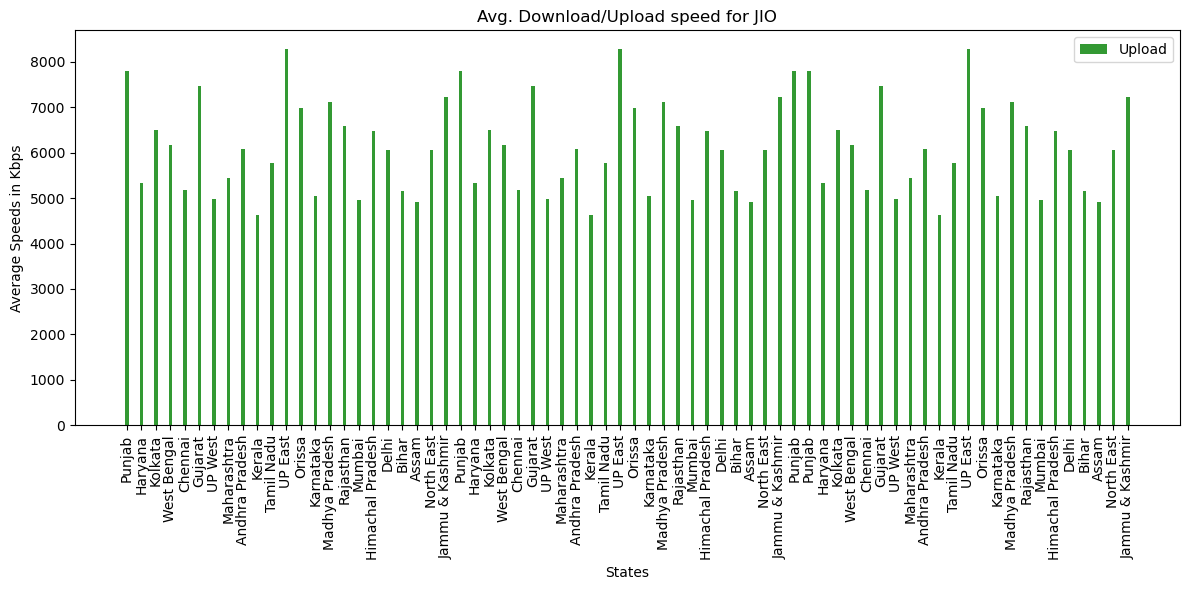

In [33]:
fig = plt.subplots(figsize=(12, 6)) 

# the width of each bar 
bar_width = 0.25

# opacity of each bar 
opacity = 0.8


# plot the upload bars   
bar_upload = plt.bar(index + bar_width, final_upload_speeds,  
                        bar_width, alpha=opacity, color='g', 
                                             label='Upload') 


# title of the graph 
plt.title('Avg. Download/Upload speed for JIO') 

# the x-axis label 
plt.xlabel('States') 

# the y-axis label 
plt.ylabel('Average Speeds in Kbps') 

# the label below each of the bars, 
# corresponding to the states 
plt.xticks(index + bar_width,final_states, rotation=90) 

# draw the legend 
plt.legend() 

# make the graph layout tight 
plt.tight_layout() 

# show the graph 
plt.show() 
